In [1]:
import mysql.connector as mysql
import pandas as pd
import folium
import requests
import googlemaps
from geopy.distance import geodesic
import numpy as np
from tqdm import tqdm
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from matplotlib import font_manager
from matplotlib import rc

#database-1.c9ks828mszs7.ap-northeast-2.rds.amazonaws.com

In [2]:
remote = mysql.connect (
    host = "database-1.c9ks828mszs7.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "roschool",
    password = "1234",
    database = "roschool"
)

In [17]:
cursor = remote.cursor(buffered=True)
cursor.execute("""

    SELECT 
    st.sido_name AS 지역,
    co.avg_salary AS 평균연봉
FROM 
    company_info co
JOIN 
    sido_type st ON co.sido_id = st.sido_id
WHERE 
    co.avg_salary IS NOT NULL
    AND st.sido_name IS NOT NULL
    AND co.avg_salary > 0
    AND st.sido_name != "정보없음"
ORDER BY 
    평균연봉 DESC;


""")
result = cursor.fetchall()

df = pd.DataFrame(result)

df.columns = ["지역", "평균연봉(만)"]

# 데이터프레임 전체 표시 설정
pd.set_option('display.max_rows', None)  # 모든 행 표시
pd.set_option('display.max_columns', None)  # 모든 열 표시
pd.set_option('display.expand_frame_repr', False)  # 수평 스크롤 방지

# 데이터프레임 출력
print(df)


df

        지역  평균연봉(만)
0    서울특별시     9175
1    대구광역시     8982
2     경상남도     8947
3    서울특별시     8723
4    인천광역시     8579
5    서울특별시     8466
6      경기도     8285
7      경기도     8256
8    서울특별시     8244
9    광주광역시     8095
10     경기도     8067
11     경기도     8060
12    전라북도     8045
13    경상남도     7894
14     경기도     7792
15     경기도     7770
16   부산광역시     7677
17     경기도     7642
18     경기도     7625
19   대구광역시     7613
20   광주광역시     7534
21   서울특별시     7225
22   서울특별시     7133
23   울산광역시     7105
24   대구광역시     7101
25   대전광역시     7092
26   부산광역시     7090
27   인천광역시     7072
28     경기도     7021
29     경기도     6924
30   대전광역시     6885
31     경기도     6869
32     경기도     6825
33     경기도     6824
34     경기도     6786
35   부산광역시     6723
36     경기도     6687
37     경기도     6659
38     경기도     6605
39   서울특별시     6589
40    충청남도     6554
41     경기도     6550
42    충청남도     6528
43   서울특별시     6499
44   서울특별시     6492
45   인천광역시     6476
46   서울특별시     6468
47   울산광역시     6411
48     경기도     6409


,지역,평균연봉(만)
0,서울특별시,9175
1,대구광역시,8982
2,경상남도,8947
3,서울특별시,8723
4,인천광역시,8579
5,서울특별시,8466
6,경기도,8285
7,경기도,8256
8,서울특별시,8244
9,광주광역시,8095


In [18]:
# 지역 정렬 순서 설정
order = ["경기도", "서울특별시", "충청남도", "전라북도", "대전광역시", 
         "부산광역시", "인천광역시", "광주광역시", "경상북도", 
         "대구광역시", "울산광역시", "경상남도", "전라남도", 
         "강원도", "충청북도", "제주도"]

# 지역 컬럼을 카테고리 타입으로 설정
df["지역"] = pd.Categorical(df["지역"], categories=order, ordered=True)

# DataFrame 정렬
df = df.sort_values(by=["지역"]).reset_index(drop=True)

# 결과 출력
print(df)


        지역  평균연봉(만)
0      경기도     5115
1      경기도     4579
2      경기도     4602
3      경기도     6376
4      경기도     6409
5      경기도     3876
6      경기도     4619
7      경기도     4506
8      경기도     3776
9      경기도     4750
10     경기도     6550
11     경기도     3696
12     경기도     4753
13     경기도     5875
14     경기도     6659
15     경기도     4676
16     경기도     6687
17     경기도     5575
18     경기도     5626
19     경기도     5839
20     경기도     4275
21     경기도     4372
22     경기도     5944
23     경기도     4266
24     경기도     5758
25     경기도     3928
26     경기도     4411
27     경기도     6197
28     경기도     4139
29     경기도     5642
30     경기도     5039
31     경기도     6285
32     경기도     3988
33     경기도     4200
34     경기도     4858
35     경기도     6605
36     경기도     6824
37     경기도     2824
38     경기도     3023
39     경기도     8285
40     경기도     8256
41     경기도     5215
42     경기도     3055
43     경기도     8067
44     경기도     8060
45     경기도     3138
46     경기도     6786
47     경기도     7770
48     경기도     4997


/tmp/ipykernel_22845/3461017812.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y="지역", x="평균연봉(만)", palette=colors)
/tmp/ipykernel_22845/3461017812.py:7: UserWarning: 
The palette list has fewer values (4) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, y="지역", x="평균연봉(만)", palette=colors)


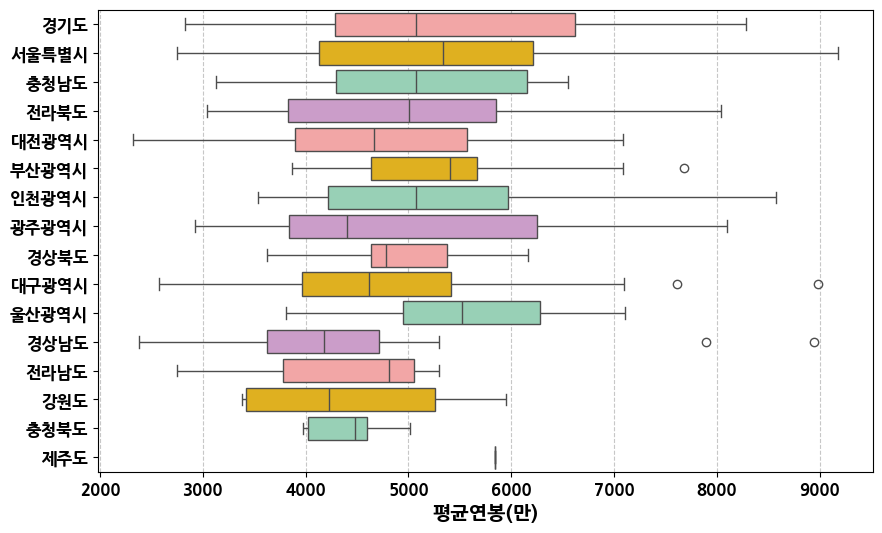

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# 박스플롯 생성
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y="지역", x="평균연봉(만)", palette=colors)

# x축 라벨 설정
plt.xlabel("평균연봉(만)", fontsize=14, fontweight="bold")
plt.ylabel("", fontsize=14, fontweight="bold")

# 제목 추가
# plt.title("지역별 평균 연봉 분포", fontsize=16, fontweight="bold")

# 눈금 폰트 크기와 굵기 설정
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")

# 격자선 설정
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()
